In [1]:
import os, copy, sys
sys.path.extend(['../..', '../../../..'])
import trkd_roi_analysis as tra
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.colors as mcolors
from matplotlib.colors import colorConverter
import matplotlib as mpl
import matplotlib.patches as mpatches

In [2]:
# name for mouse_df
mouse_df_fnm = '../../../../mouse_df.csv'
mouse_df, _, _ = tra.set_up_mouse_info(mouse_df_fnm)

All mice:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Mice with all of sessions 1-3 : [ 1  3  4  6  7  8  9 10 11 12 13]


<h2>Load data</h2>

In [3]:
mask_fnm = '../../data/nway_union_tmasks__all_4_planes.h5'
nway_union_tmasks_df = pd.read_hdf(mask_fnm)
# perm_mask_fnm = './nway_perm_tmasks__mice_4_6.h5'
# nway_perm_tmasks_df = pd.read_hdf(perm_mask_fnm)

In [4]:
nway_union_tmasks_df

,mouse_n,layer,compartment,masks
0,6,L2/3,Dendrites,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,11,L5,Dendrites,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,3,L2/3,Somas,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,4,L5,Somas,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


<h2>Main cell to plot data</h2>

In [8]:
%%time


compartments = {'soma':'Somas', 'dend':'Dendrites'}
sess_ns = np.array([1,2,3])

pdf_fnm = '../../plots/supp-fig-1.pdf'

with PdfPages(pdf_fnm) as pdf:
    fig, ax = plot_figure(sess_ns, nway_union_tmasks_df, nway_union_tmasks_df)
    pdf.savefig()
    plt.close()    

Dendrites
Somas
CPU times: user 6.5 s, sys: 644 ms, total: 7.14 s
Wall time: 6 s


Dendrites
Somas
CPU times: user 171 ms, sys: 12.4 ms, total: 183 ms
Wall time: 178 ms


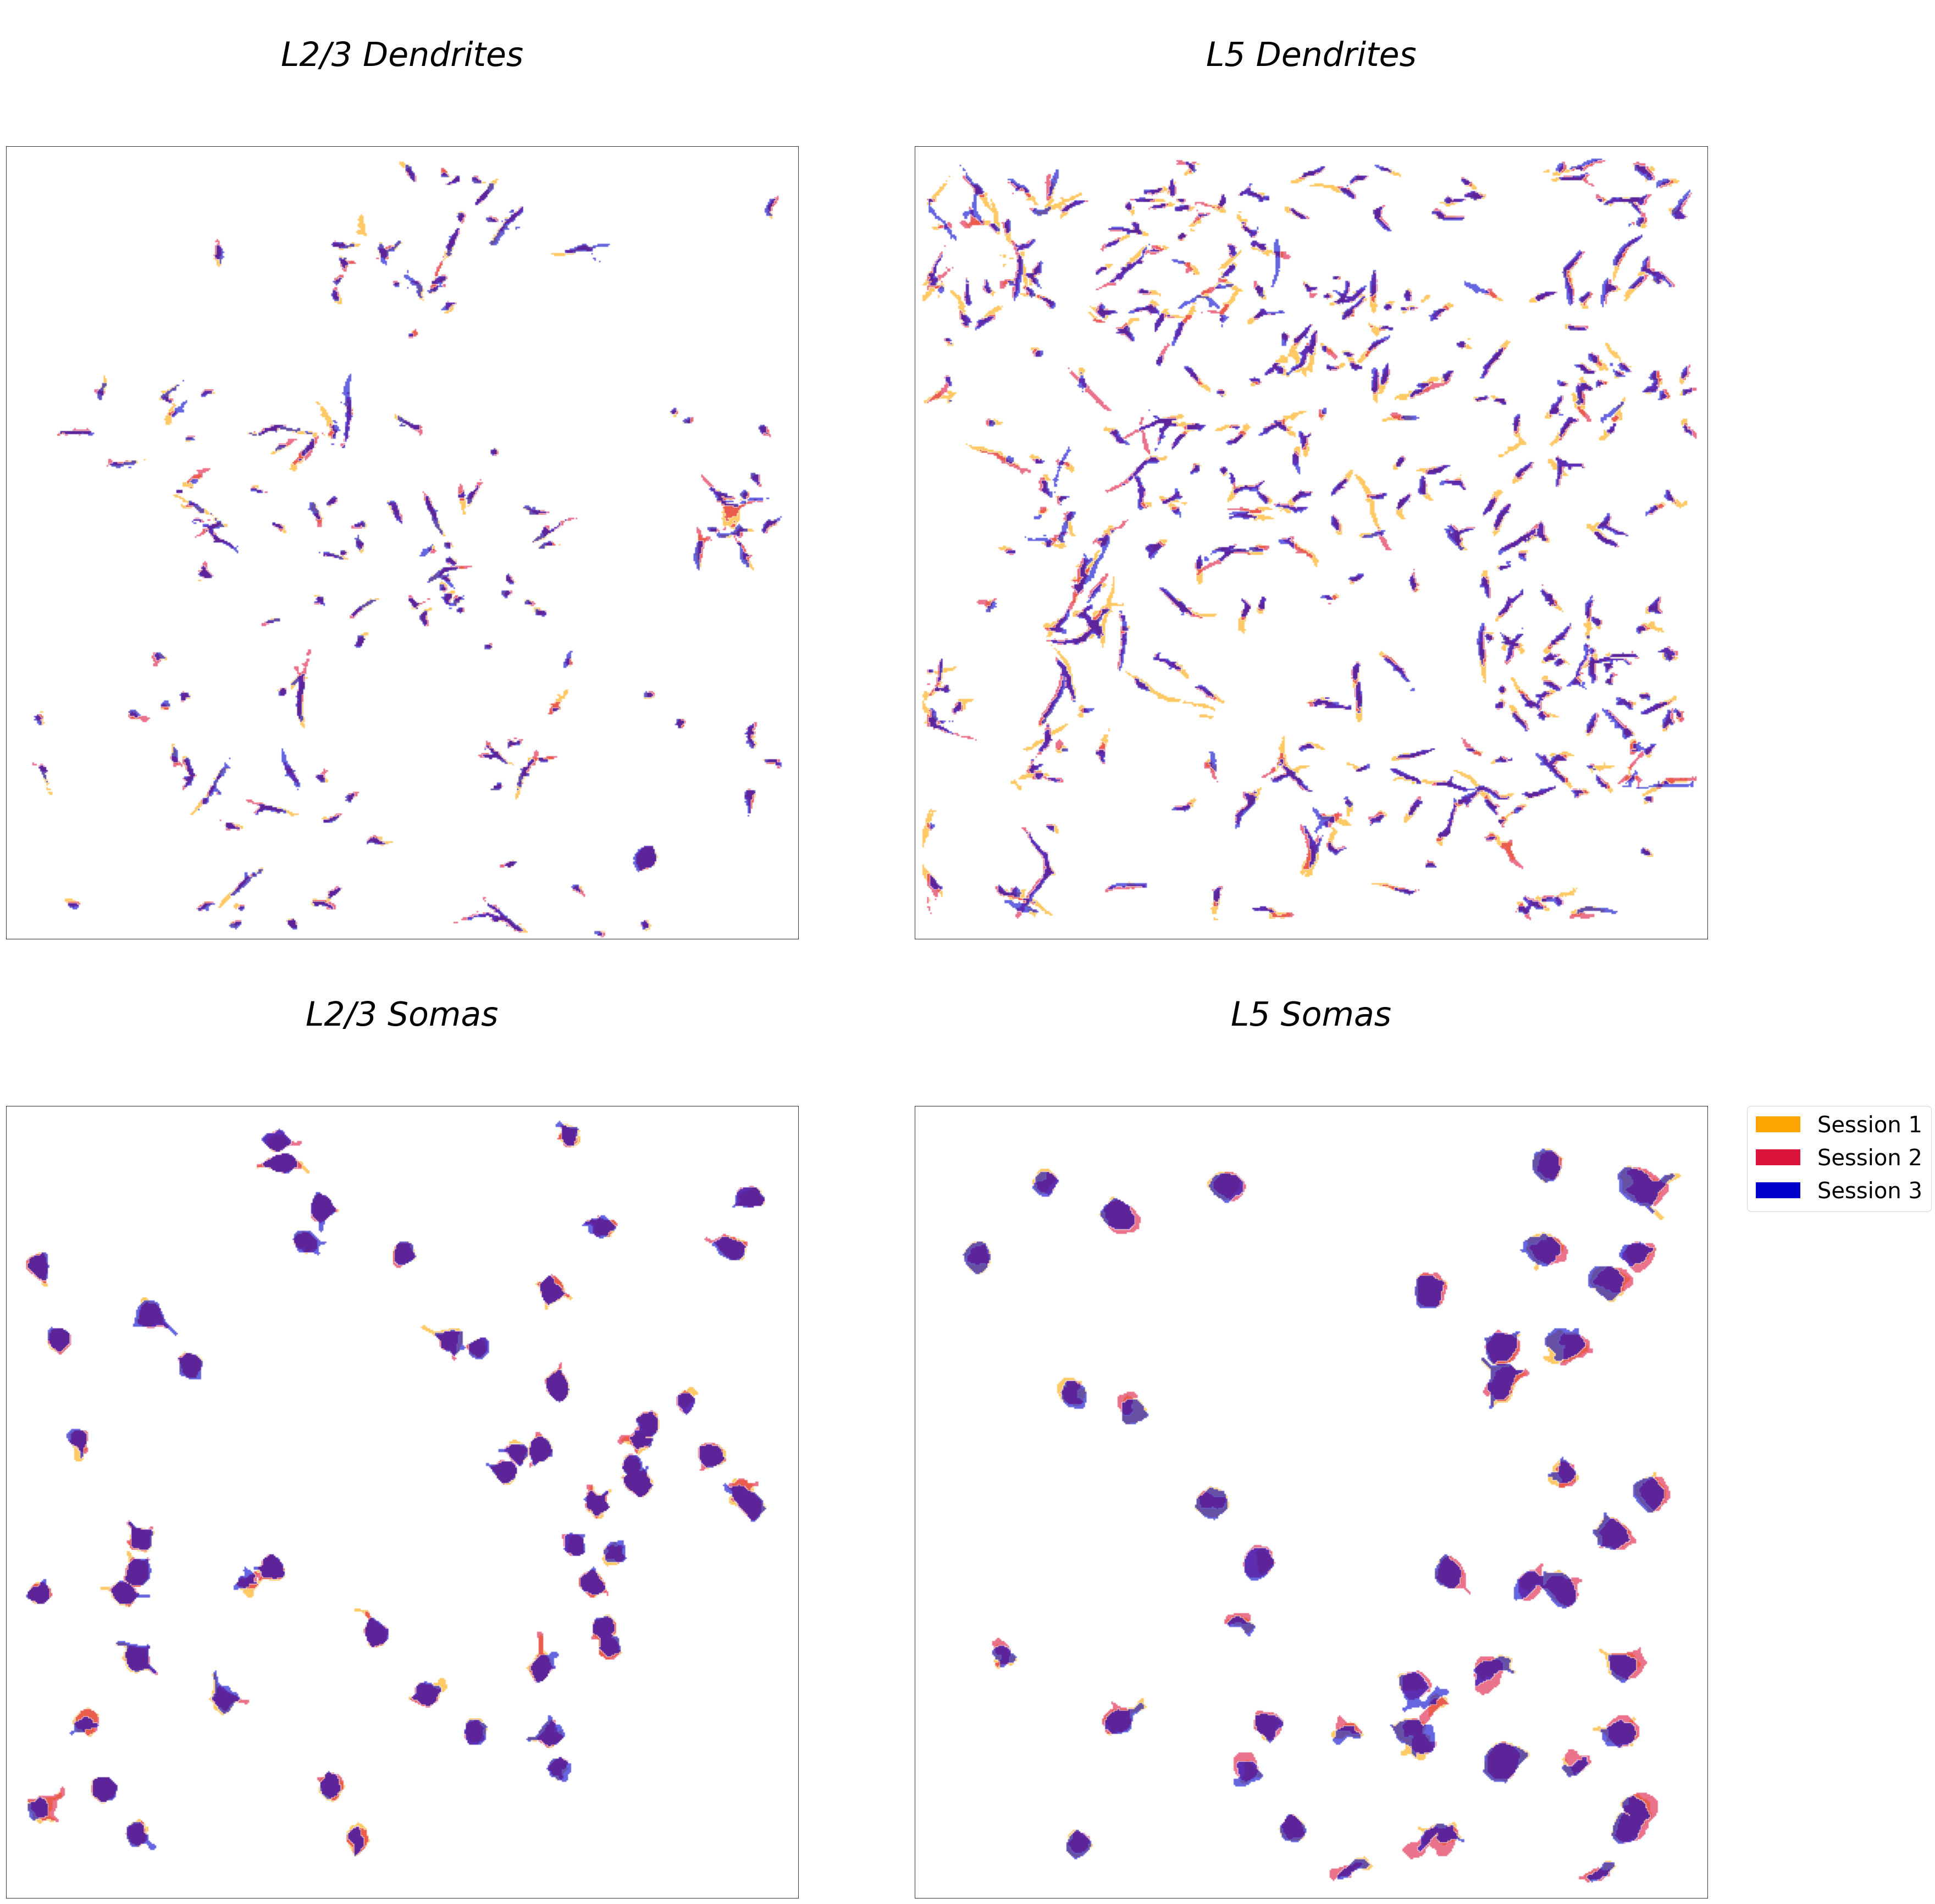

In [7]:
%%time

compartments = {'soma':'Somas', 'dend':'Dendrites'}
sess_ns = np.array([1,2,3])

fig, ax = plot_figure(sess_ns, nway_union_tmasks_df, nway_union_tmasks_df)

**Caption draft**: The modified matching pipeline prduces plausible ROI matches for all 4 imaged planes.

<h2>Plotting function</h2>

In [5]:
def plot_figure(sess_ns, nway_union_tmasks_df, nway_perm_tmasks_df):

    newcolor = 'orange'
    newcolor1 = 'crimson'
    colors = [mcolors.CSS4_COLORS[newcolor],
              mcolors.CSS4_COLORS[newcolor1],
              mcolors.CSS4_COLORS['mediumblue']]
    levels=256
    alphas = 0.6*np.ceil(np.linspace(0, 0.8, levels+3))
    
    sess_natural_order = copy.deepcopy(sess_ns)
    sess_natural_order.sort()
    sess_nat_str = ', '.join(sess_natural_order.astype(str))


    
    fig, ax = plt.subplots(2,2, figsize=(50,48), constrained_layout=True)
    compartments = nway_union_tmasks_df['compartment'].unique()
    layers = nway_union_tmasks_df['layer'].unique()
    for plt_row, compartment in enumerate(compartments):
        print(compartment)

        mask0 = nway_union_tmasks_df['compartment']==compartment
        for plt_col, layer in enumerate(layers):
            mask1 = nway_union_tmasks_df['layer']==layer
            masks = mask0 & mask1
            nway_tmasks = nway_union_tmasks_df[masks]['masks'].values[0]

            plt.sca(ax[plt_row, plt_col])
            for k,_ in enumerate(sess_ns):
                cmap = mpl.colors.LinearSegmentedColormap.from_list(
                    'my_cmap',['white', colors[k]],N=levels)
                cmap._init()
                cmap._lut[:,-1] = alphas
                im = plt.imshow(nway_tmasks[k,:], cmap=cmap)
            
            plt.xticks([], [])
            plt.yticks([], [])
            plt.title('\n{} {}\n\n'.format(layer, compartment), fontsize=60, fontstyle='italic')
            if plt_row ==1 and plt_col == 1:
                patches = [ mpatches.Patch(color=colors[i], label="Session {l}".format(l=sess_ns[i]) ) 
                           for i in range(len(sess_ns)) ]
                plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=40)

    return fig, ax